In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import anndata as an
from kneed import KneeLocator

### 1. Select the guides for analysis

/tmp/ipykernel_3418130/3016108683.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df.index, df['IntersectionCount'],


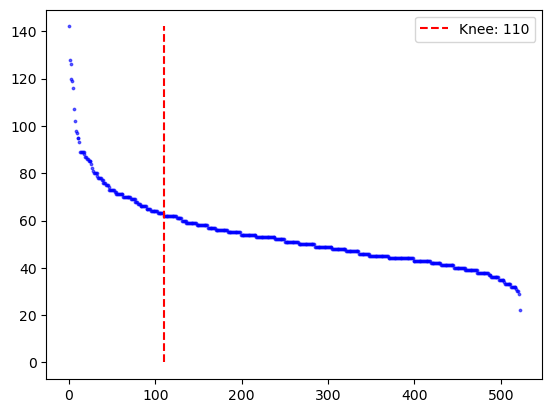

In [2]:

pert_type = "crispra"  # or "crispri"

df = pd.read_csv(f'/home/user/Documents/Kinase_project/{pert_type}_final/deg_ntc_kinases.csv')
plt.scatter(df.index, df['IntersectionCount'], 
            s=3,  # size of points
            c='blue',  # color of points
            alpha=0.6,  # transparency
            cmap='viridis')  # color map

# Increase S to be more strict (e.g., S=15 or S=20)
kn = KneeLocator(df.index, df['IntersectionCount'], curve='convex', direction='decreasing', S=10)
kn.knee

# Plot the knee location
plt.vlines(kn.knee, ymin=0, ymax=df['IntersectionCount'].max(), linestyles='dashed', colors='red', label=f'Knee: {kn.knee}')
plt.legend()
plt.show()

top_kinases = df['Kinase'].head(kn.knee).values
valid_gene_ids = list(top_kinases) + ['NTC']


In [3]:
top_kinases

array(['PRKG1', 'RPS6KB1', 'CSNK1G3', 'MAPKAPK2', 'BUB1B', 'RPS6KA4',
       'RYK', 'PAK7', 'STRADB', 'FGFR4', 'MAPK1', 'FES', 'HIPK3', 'IRAK4',
       'MAP3K19', 'MAK', 'TRIB3', 'STYK1', 'MAPK7', 'OXSR1', 'CDK3',
       'KIT', 'SCYL1', 'AATK', 'PIM3', 'CAMK2G', 'PSKH1', 'EIF2AK1',
       'STRADA', 'HSPB8', 'EPHA5', 'BMP2K', 'ULK3', 'FYN', 'MUSK',
       'MAST2', 'PDK4', 'EPHB3', 'PIM1', 'JAK1', 'GSK3A', 'TNNI3K',
       'NEK11', 'CDK6', 'TLK2', 'GRK6', 'ERBB4', 'CSNK1A1', 'PSKH2',
       'MAPK12', 'BRAF', 'TYRO3', 'CSK', 'CSNK1D', 'PAK3', 'random',
       'CDK10', 'WNK3', 'MINK1', 'MAP2K2', 'PAK4', 'RPS6KA6', 'NLK',
       'PRKG2', 'CLK1', 'HCK', 'PDPK1', 'KIAA1804', 'MAP4K5', 'EPHB6',
       'CAMKK2', 'PRPF4B', 'LATS2', 'CAMK1G', 'CDK5', 'GRK4', 'ADRBK1',
       'CDK16', 'BMPR2', 'STK3', 'VRK1', 'CDKL1', 'BCKDK', 'AURKB',
       'ADCK3', 'CDK2', 'ALPK2', 'PHKG2', 'DYRK2', 'ACVR1C', 'TNK2',
       'MAST1', 'PAK2', 'MET', 'LYN', 'LRRK1', 'PIK3CD', 'MAP3K12',
       'LMTK2', 'FGFR1', 'T

### 2. Prepare TCDG files

In [4]:
df = pd.read_csv(f'/home/user/Documents/Kinase_project/figures/decipher_analysis/NTC_{pert_type}/T_cell_dose_gene.csv')
T_cell_dose_gene = df['gene_short_name']

In [5]:
T_cell_dose_gene

0           TSPAN6
1              CFH
2             GCLC
3           NIPAL3
4              BAD
           ...    
4018          CDR1
4019    FP565324.1
4020    AC116366.3
4021    AC004922.1
4022    AC119674.2
Name: gene_short_name, Length: 4023, dtype: object

### 3. Generate raw and hvg files

In [6]:
gbm= an.read_h5ad(f'/home/user/Documents/Kinase_project/{pert_type}_final/preprocessed_cds_without_Tcells.h5ad')

In [7]:
gbm

AnnData object with n_obs × n_vars = 313199 × 56648
    obs: 'P7', 'P5', 'sample', 'n.umi', 'log10.umi', 'percent_mito', 'cell_ID', 'RT', 'Lig', 'new_cell', 'oligo', 'total_reads.x', 'total_hash_umis_per_cell_ID', 'top_to_second_best_ratio', 'treatment', 'sgRNA', 'total_reads.y', 'sgRNA_proportion', 'total_sgrna_read_per_cell', 'rank', 'top_to_second', 'second_to_third', 'third_to_next', 'top_proportion', 'second_proportion', 'third_proportion', 'top_sg', 'second_sg', 'third_sg', 'gene', 'second_sg_gene', 'third_sg_gene', 'cell', 'RT_lig', 'num_genes_expressed', 'Size_Factor', 'gene_id', 'replicate', 'g1s_score', 'g2m_score', 'proliferation_index', 'dose', 'UMAP1', 'UMAP2', 'PCA_Cluster'
    var: 'features'

In [8]:
# Filter out cells where sgRNA is NA
gbm = gbm[~gbm.obs['sgRNA'].isna()].copy()
gbm

AnnData object with n_obs × n_vars = 313199 × 56648
    obs: 'P7', 'P5', 'sample', 'n.umi', 'log10.umi', 'percent_mito', 'cell_ID', 'RT', 'Lig', 'new_cell', 'oligo', 'total_reads.x', 'total_hash_umis_per_cell_ID', 'top_to_second_best_ratio', 'treatment', 'sgRNA', 'total_reads.y', 'sgRNA_proportion', 'total_sgrna_read_per_cell', 'rank', 'top_to_second', 'second_to_third', 'third_to_next', 'top_proportion', 'second_proportion', 'third_proportion', 'top_sg', 'second_sg', 'third_sg', 'gene', 'second_sg_gene', 'third_sg_gene', 'cell', 'RT_lig', 'num_genes_expressed', 'Size_Factor', 'gene_id', 'replicate', 'g1s_score', 'g2m_score', 'proliferation_index', 'dose', 'UMAP1', 'UMAP2', 'PCA_Cluster'
    var: 'features'

In [9]:
gbm.X.max()

4161.0

In [10]:
gbm_crop = gbm[
    (gbm.obs['total_sgrna_read_per_cell'] > 3) & 
    (gbm.obs['top_proportion'] > 0.3)
].copy()
gbm_crop

AnnData object with n_obs × n_vars = 255701 × 56648
    obs: 'P7', 'P5', 'sample', 'n.umi', 'log10.umi', 'percent_mito', 'cell_ID', 'RT', 'Lig', 'new_cell', 'oligo', 'total_reads.x', 'total_hash_umis_per_cell_ID', 'top_to_second_best_ratio', 'treatment', 'sgRNA', 'total_reads.y', 'sgRNA_proportion', 'total_sgrna_read_per_cell', 'rank', 'top_to_second', 'second_to_third', 'third_to_next', 'top_proportion', 'second_proportion', 'third_proportion', 'top_sg', 'second_sg', 'third_sg', 'gene', 'second_sg_gene', 'third_sg_gene', 'cell', 'RT_lig', 'num_genes_expressed', 'Size_Factor', 'gene_id', 'replicate', 'g1s_score', 'g2m_score', 'proliferation_index', 'dose', 'UMAP1', 'UMAP2', 'PCA_Cluster'
    var: 'features'

In [11]:
filtered_gbm_crop = gbm_crop[gbm_crop.obs['gene_id'].isin(valid_gene_ids)]
print("Filtered gene IDs:", filtered_gbm_crop.obs['gene_id'].unique())

Filtered gene IDs: ['NTC' 'random' 'FYN' 'CDK6' 'TNK2' 'LRRK1' 'TLK2' 'AURKB' 'GRK6' 'GSK3A'
 'TNNI3K' 'HSPB8' 'MAST1' 'PRKG2' 'CDK10' 'PIK3CD' 'PIM1' 'PSKH1' 'CSNK1D'
 'FGFR2' 'PAK3' 'AATK' 'LATS2' 'ERBB4' 'PAK2' 'CDK16' 'PIM3' 'CSNK1A1'
 'CDK2' 'MAPK7' 'MAST2' 'HIPK3' 'PRKG1' 'CLK1' 'NEK3' 'IRAK4' 'HCK'
 'MAP3K19' 'WNK3' 'OXSR1' 'MAK' 'MAP3K12' 'CAMK1G' 'BMP2K' 'ADCK3' 'FGFR4'
 'PDPK1' 'STRADA' 'LMTK2' 'BMPR2' 'MINK1' 'EPHA5' 'TRIB3' 'KIAA1804'
 'MAP4K5' 'ACVR1C' 'CSNK1G3' 'CDK3' 'FER' 'MAPK1' 'RPS6KB1' 'EIF2AK1'
 'BRDT' 'MET' 'VRK1' 'EPHB6' 'BUB1B' 'JAK1' 'PSKH2' 'LYN' 'DYRK2' 'MAPK12'
 'KIT' 'STYK1' 'MAP2K2' 'EPHB3' 'RPS6KA4' 'PAK4' 'NEK11' 'RPS6KA6' 'ALPK2'
 'BRAF' 'TYRO3' 'CSK' 'MAPKAPK2' 'PAK7' 'RYK' 'BCKDK' 'FES' 'CAMKK2'
 'CDKL1' 'PHKG2' 'ULK3' 'FGFR1' 'STRADB' 'TRIB2' 'CAMK2G' 'CDC42BPG'
 'CDK5' 'ACVR2A' 'MUSK' 'TSSK6' 'ADRBK1' 'SCYL1' 'MAP3K3' 'GRK4' 'NLK'
 'STK3' 'PDK4' 'CDC42BPA' 'PRPF4B']


In [12]:
gene_id_counts = filtered_gbm_crop.obs['gene_id'].value_counts()
gene_id_counts

gene_id
NTC       24705
random     1130
FER        1080
TNK2        939
CAMK1G      784
          ...  
EPHA5       239
CAMKK2      239
BUB1B       234
BMP2K       221
BRAF        204
Name: count, Length: 111, dtype: int64

In [13]:
# Filter genes with >= 25 cells
valid_gene_ids = gene_id_counts[gene_id_counts >= 25].index
filtered_gbm_crop = filtered_gbm_crop[filtered_gbm_crop.obs['gene_id'].isin(valid_gene_ids)]
filtered_gene_id_counts = filtered_gbm_crop.obs['gene_id'].value_counts()
filtered_gene_id_counts

gene_id
NTC       24705
random     1130
FER        1080
TNK2        939
CAMK1G      784
          ...  
EPHA5       239
CAMKK2      239
BUB1B       234
BMP2K       221
BRAF        204
Name: count, Length: 111, dtype: int64

In [14]:
filtered_gbm_crop.obs['gene_id']

01A_A01_RT_BC_100_Lig_BC_138       NTC
01A_A01_RT_BC_100_Lig_BC_140    random
01A_A01_RT_BC_100_Lig_BC_146       FYN
01A_A01_RT_BC_100_Lig_BC_192       NTC
01A_A01_RT_BC_100_Lig_BC_33       CDK6
                                 ...  
12A_H12_RT_BC_99_Lig_BC_180       MUSK
12A_H12_RT_BC_99_Lig_BC_27         NTC
12A_H12_RT_BC_99_Lig_BC_5       random
12A_H12_RT_BC_99_Lig_BC_94         NTC
12A_H12_RT_BC_99_Lig_BC_98       MAST2
Name: gene_id, Length: 71922, dtype: object

In [15]:
# Filter NTC cells
ntc_cells = filtered_gbm_crop[filtered_gbm_crop.obs['gene_id'] == 'NTC']

# Randomly sample 489 NTC cells (Top kinases gene count)
ntc_sampled_indices = ntc_cells.obs.sample(n=filtered_gbm_crop.obs['gene_id'].value_counts()[1], random_state=1).index
ntc_sampled_adata = filtered_gbm_crop[filtered_gbm_crop.obs.index.isin(ntc_sampled_indices)].copy()

# Filter out NTC cells from the original data to get non-NTC data
non_ntc_adata = filtered_gbm_crop[filtered_gbm_crop.obs['gene_id'] != 'NTC']

# Combine sampled NTC cells with non-NTC data
combined_adata = ntc_sampled_adata.concatenate(non_ntc_adata)
combined_adata

/tmp/ipykernel_3418130/976759071.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ntc_sampled_indices = ntc_cells.obs.sample(n=filtered_gbm_crop.obs['gene_id'].value_counts()[1], random_state=1).index
/tmp/ipykernel_3418130/976759071.py:12: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_adata = ntc_sampled_adata.concatenate(non_ntc_adata)


AnnData object with n_obs × n_vars = 48347 × 56648
    obs: 'P7', 'P5', 'sample', 'n.umi', 'log10.umi', 'percent_mito', 'cell_ID', 'RT', 'Lig', 'new_cell', 'oligo', 'total_reads.x', 'total_hash_umis_per_cell_ID', 'top_to_second_best_ratio', 'treatment', 'sgRNA', 'total_reads.y', 'sgRNA_proportion', 'total_sgrna_read_per_cell', 'rank', 'top_to_second', 'second_to_third', 'third_to_next', 'top_proportion', 'second_proportion', 'third_proportion', 'top_sg', 'second_sg', 'third_sg', 'gene', 'second_sg_gene', 'third_sg_gene', 'cell', 'RT_lig', 'num_genes_expressed', 'Size_Factor', 'gene_id', 'replicate', 'g1s_score', 'g2m_score', 'proliferation_index', 'dose', 'UMAP1', 'UMAP2', 'PCA_Cluster', 'batch'
    var: 'features'

In [16]:
combined_adata.obs['gene_id'].value_counts()

gene_id
NTC       1130
random    1130
FER       1080
TNK2       939
CAMK1G     784
          ... 
EPHA5      239
CAMKK2     239
BUB1B      234
BMP2K      221
BRAF       204
Name: count, Length: 111, dtype: int64

In [17]:
combined_adata_tcdg = combined_adata[:, combined_adata.var['features'].isin(T_cell_dose_gene.values)]
combined_adata_tcdg

View of AnnData object with n_obs × n_vars = 48347 × 4023
    obs: 'P7', 'P5', 'sample', 'n.umi', 'log10.umi', 'percent_mito', 'cell_ID', 'RT', 'Lig', 'new_cell', 'oligo', 'total_reads.x', 'total_hash_umis_per_cell_ID', 'top_to_second_best_ratio', 'treatment', 'sgRNA', 'total_reads.y', 'sgRNA_proportion', 'total_sgrna_read_per_cell', 'rank', 'top_to_second', 'second_to_third', 'third_to_next', 'top_proportion', 'second_proportion', 'third_proportion', 'top_sg', 'second_sg', 'third_sg', 'gene', 'second_sg_gene', 'third_sg_gene', 'cell', 'RT_lig', 'num_genes_expressed', 'Size_Factor', 'gene_id', 'replicate', 'g1s_score', 'g2m_score', 'proliferation_index', 'dose', 'UMAP1', 'UMAP2', 'PCA_Cluster', 'batch'
    var: 'features'

In [18]:
combined_adata_tcdg.var.rename(columns={'_index':'index'},inplace=True)
combined_adata_tcdg.raw.var.rename(columns={'_index':'index'},inplace=True) 
combined_adata_tcdg.write_h5ad(f'/home/user/Documents/Kinase_project/{pert_type}_final/filtered_gbm_{pert_type}_crop.h5ad')

/home/user/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/user/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/user/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/user/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/user/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/user/anaconda3